# Exam Preparation: Greeks

## Setup

In [60]:
import numpy as np
import fixed_income_derivatives as fid
import matplotlib.pyplot as plt

To illustrate the nature of the greeks for a caplet, we will generate spot rates using a Vasicek model with parameters $r_0=0.025, a=0.5, b=0.025$ and $\sigma_{r_0}=0.02$.

The long run mean of the short rate is in this example $\frac{b}{a}=0.05$.\
The short rate is initially $r_0=0.025$ why both the spot rate term structure of interest rates as well as the $3 \mathrm{M}$ forward term structure of interest rates is increasing.

Having constructed data using this model, we can then plot and analyze the behavior of caplet greeks written on $3 \mathrm{M}$ forward LIBOR.

### Spot and Forward Rates

In [61]:
# Vasicek model parameters
alpha = 0.25 # quarterly tenor (3Ms)
r0, a, b, sigma_vasicek = 0.025, 0.5, 0.025, 0.02

# compute array of time to maturities and strikes (K)
idx_maturity = np.array([2,3,4,6,8,12,16,24,40])
sigma_caplet = 0.3
strike = np.array([i*0.0001 for i in range(1,1001)])

N_maturity = len(idx_maturity)
N_strike = len(strike)
T_max = 10
M = int(round(T_max/alpha))
T = np.array([i*alpha for i in range(0,M+1)])

Using that Vasicek possess an Affine term structure:

In [62]:
p = fid.zcb_price_vasicek(r0,a,b,sigma_vasicek,T)
R = fid.spot_rate_vasicek(r0,a,b,sigma_vasicek,T)
f_libor_3m = fid.zcb_to_forward_LIBOR_rates(T,p,horizon = 1) 

Plot of spot and forward rates

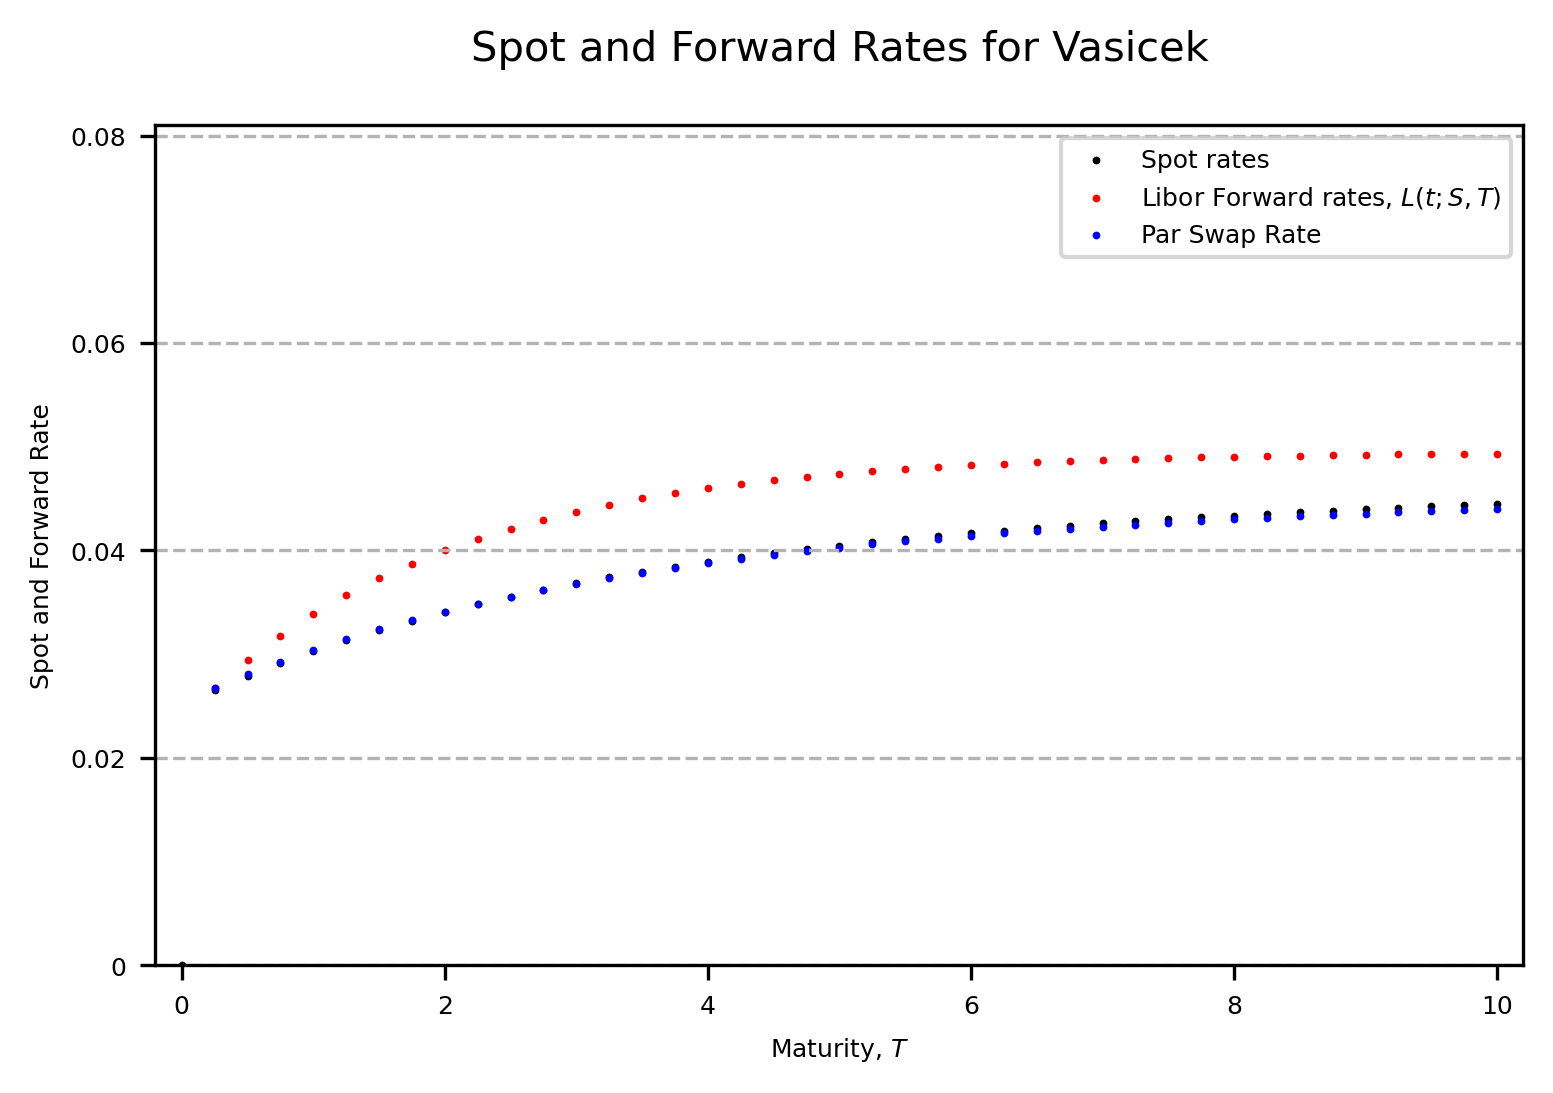

In [63]:
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (6,4))
fig.suptitle(f"Spot and Forward Rates for Vasicek", fontsize = 10)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
plt.grid(which='minor', color='grey', linestyle='--')

xticks = [0,2,4,6,8,10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity, $T$",fontsize =6)
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08],fontsize = 6)
ax.set_ylim([0,0.081])
plt.ylabel(f"Spot and Forward Rate",fontsize = 6)
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T[0:], R[0:], s = 3, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T[1:], f_libor_3m[1:], s = 3, color = 'red', marker = ".",label="Libor Forward rates, $L(t;S,T)$")
p3 = ax.scatter(T[1:], R_swap[1:], s=3, color='blue', marker='.', linestyle='-', label="Par Swap Rate") # smack on forward rates

plots = [p1,p2,p3]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 6)
#
plt.show()

## Greeks of Caplets

Now we examine the Greeks of Caplets written on 3M Forward Libor Rates

In [64]:
# caplet greeks
delta, gamma, vega, theta = np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike])
for i in range(0,N_maturity):
    for j in range(0,N_strike):
        delta[i,j] = fid.black_caplet_delta(sigma_caplet,T[idx_maturity[i]],strike[j],alpha,p[idx_maturity[i]],f_libor_3m[idx_maturity[i]])
        gamma[i,j] = fid.black_caplet_gamma(sigma_caplet,T[idx_maturity[i]],strike[j],alpha,p[idx_maturity[i]],f_libor_3m[idx_maturity[i]])
        vega[i,j] = fid.black_caplet_vega(sigma_caplet,T[idx_maturity[i]],strike[j],alpha,p[idx_maturity[i]],f_libor_3m[idx_maturity[i]])
        theta[i,j] = fid.black_caplet_theta(sigma_caplet,T[idx_maturity[i]],r0,strike[j],alpha,p[idx_maturity[i]],f_libor_3m[idx_maturity[i]])

### Delta ($\Delta$)

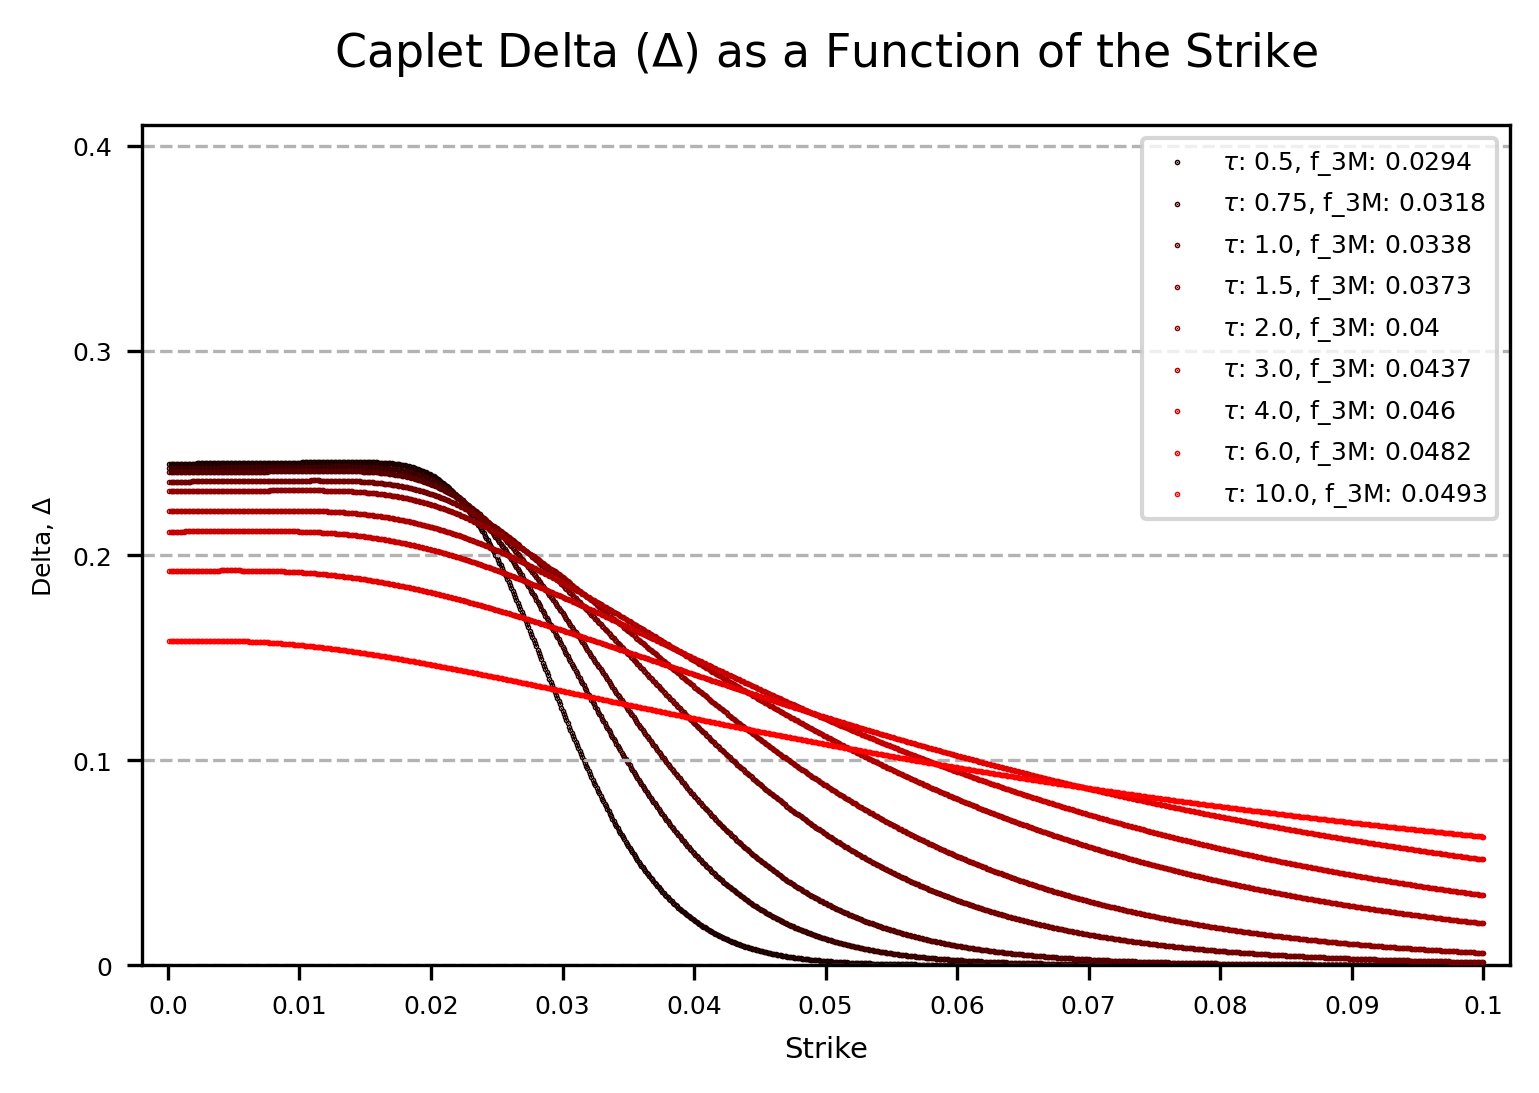

In [65]:
# Plotting delta
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (6,4))
fig.suptitle(f"Caplet Delta ($\Delta$) as a Function of the Strike", fontsize = 11)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [i*0.01 for i in range(0,11)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.002,xticks[-1]+0.002])
plt.xlabel(f"Strike",fontsize = 7)
ax.set_yticks([0,0.1,0.2,0.3,0.4])
ax.set_yticklabels([0,0.1,0.2,0.3,0.4],fontsize = 6)
ax.set_ylim([0,0.41])
plt.ylabel(f"Delta, $\\Delta$",fontsize = 6)
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--',zorder = 0)
plots = []
for i in range(0,N_maturity):
    plot = ax.scatter(strike, delta[i,:], s = 0.5, color = ((i+1)/N_maturity,0,0), marker = ".",label=f"$\\tau$: {T[idx_maturity[i]]}, f_3M: {round(f_libor_3m[idx_maturity[i]],4)}",zorder = i)
    plots.append(plot)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 6)

plt.show()

### Gamma ($\Gamma$)

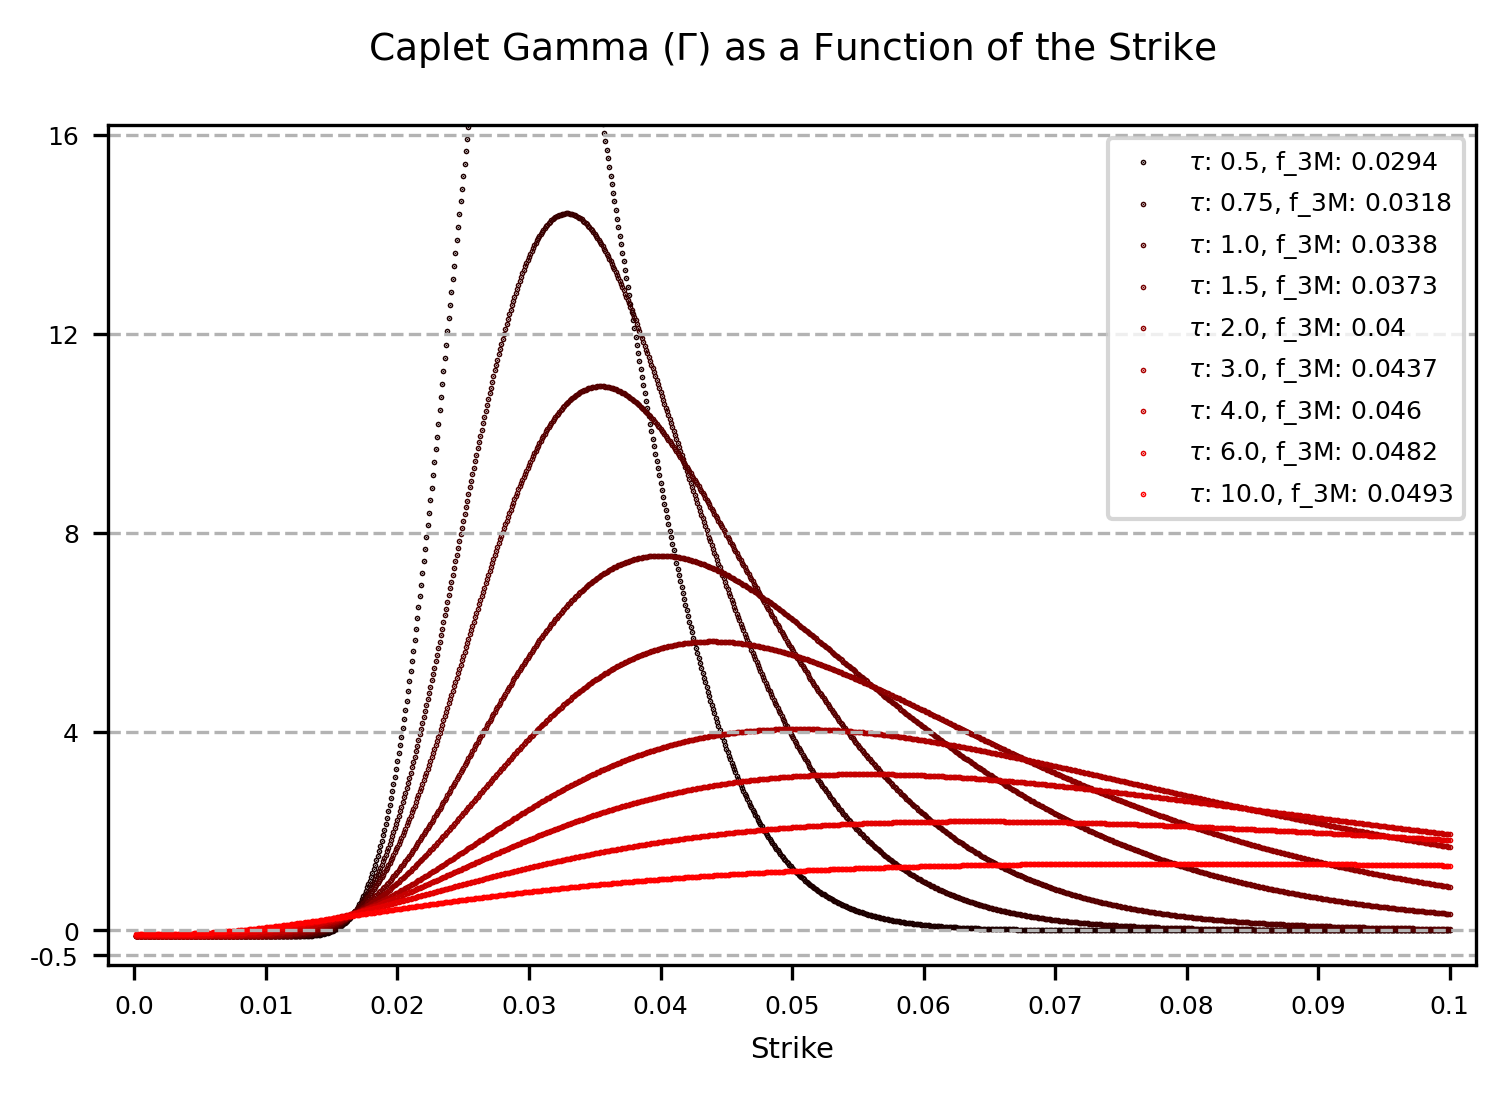

In [66]:
# Plotting gamma
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (6,4))
fig.suptitle(f"Caplet Gamma ($\Gamma$) as a Function of the Strike", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [i*0.01 for i in range(0,11)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.002,xticks[-1]+0.002])
plt.xlabel(f"Strike",fontsize = 7)
ax.set_yticks([-0.5,0,4,8,12,16])
ax.set_yticklabels([-0.5,0,4,8,12,16],fontsize = 6)
ax.set_ylim([-0.7,16.2])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
plots = []
for i in range(0,N_maturity):
    plot = ax.scatter(strike, gamma[i,:], s = 0.5, color = ((i+1)/N_maturity,0,0), marker = ".",label=f"$\\tau$: {T[idx_maturity[i]]}, f_3M: {round(f_libor_3m[idx_maturity[i]],4)}")
    plots.append(plot)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 6)

plt.show()

### Vega ($\nu$)

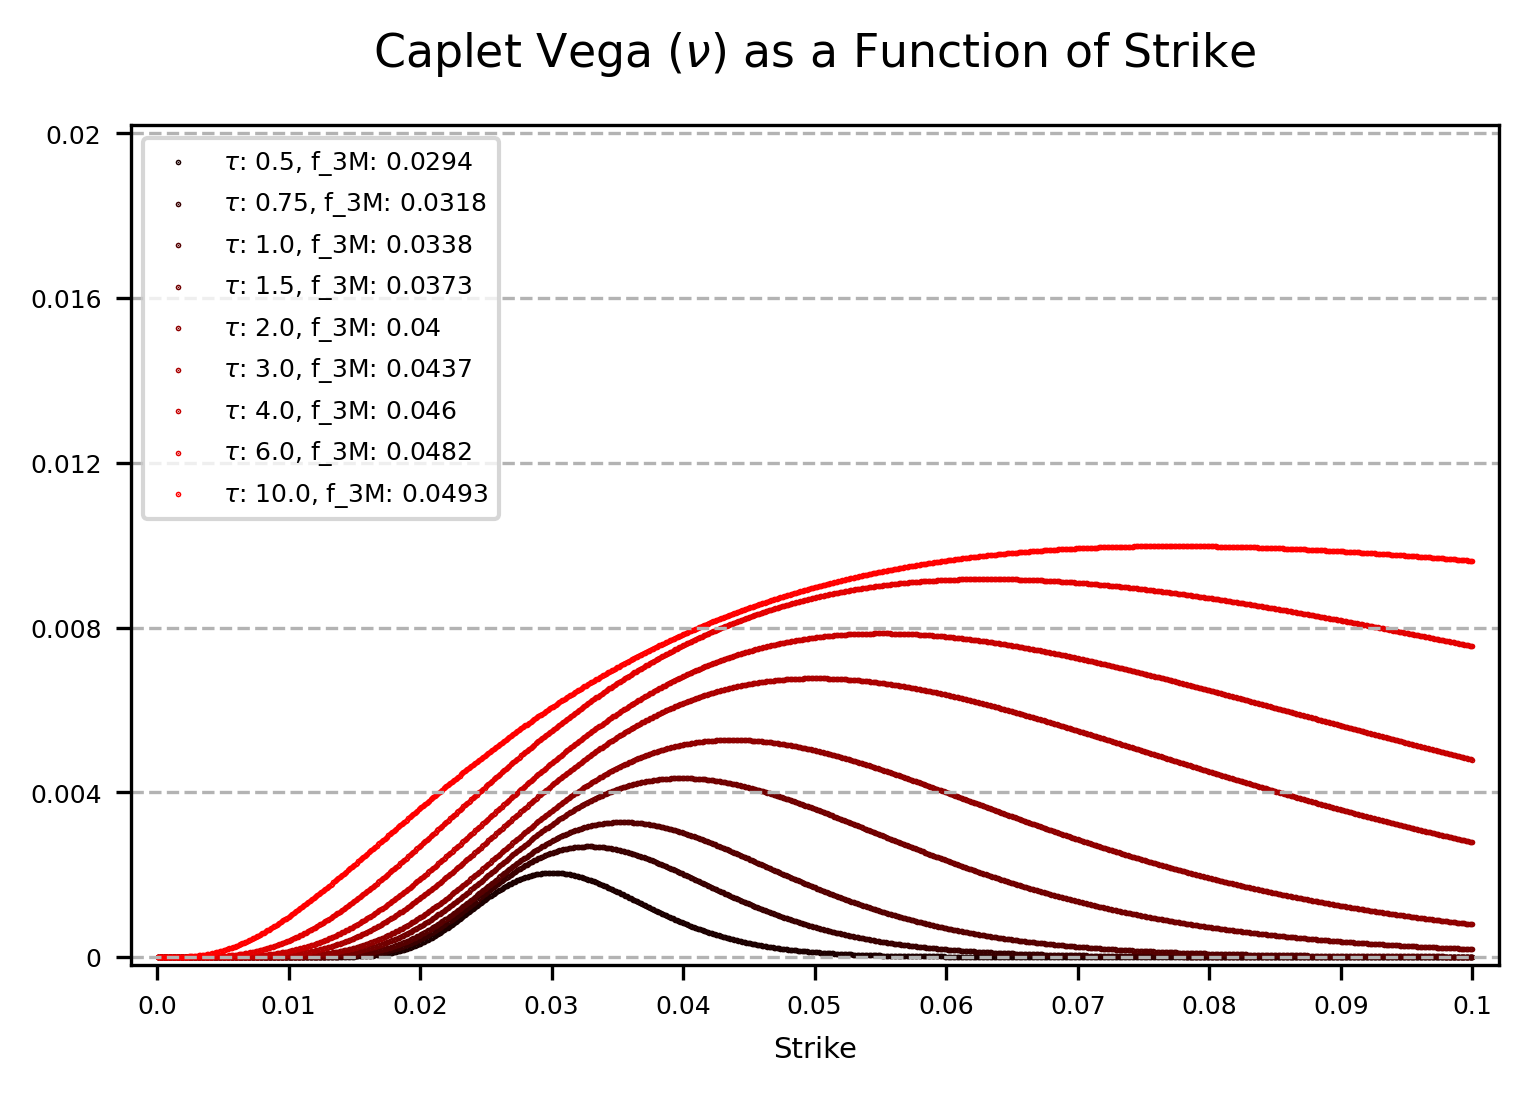

In [67]:
# Plotting vega
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (6,4))
fig.suptitle(f"Caplet Vega ($\\nu$) as a Function of Strike", fontsize = 11)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [i*0.01 for i in range(0,11)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.002,xticks[-1]+0.002])
plt.xlabel(f"Strike",fontsize = 7)
ax.set_yticks([0,0.004,0.008,0.012,0.016,0.02])
ax.set_yticklabels([0,0.004,0.008,0.012,0.016,0.02],fontsize = 6)
ax.set_ylim([-0.0002,0.0202])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
plots = []
for i in range(0,N_maturity):
    plot = ax.scatter(strike, vega[i,:], s = 0.5, color = ((i+1)/N_maturity,0,0), marker = ".",label=f"$\\tau$: {T[idx_maturity[i]]}, f_3M: {round(f_libor_3m[idx_maturity[i]],4)}")
    plots.append(plot)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper left",fontsize = 6)

plt.show()

### Theta ($\Theta$)

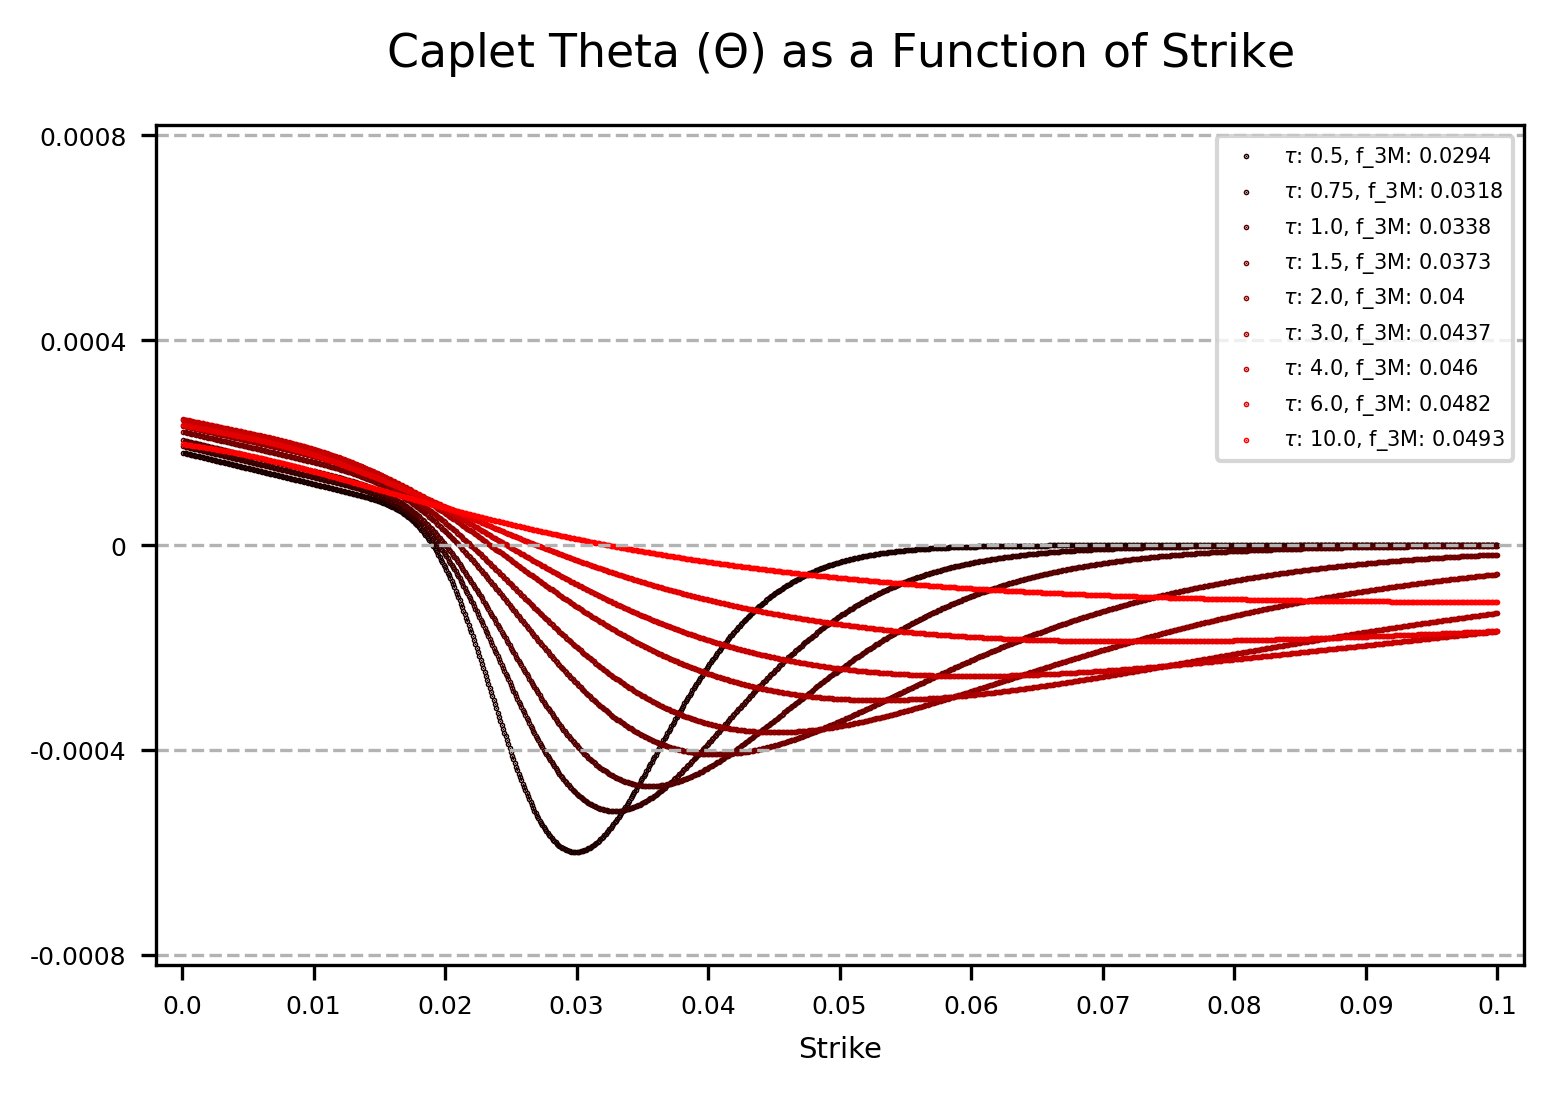

In [68]:
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (6,4))
fig.suptitle(f"Caplet Theta ($\Theta$) as a Function of Strike", fontsize = 11)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [i*0.01 for i in range(0,11)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.002,xticks[-1]+0.002])
plt.xlabel(f"Strike",fontsize = 7)
ax.set_yticks([-0.0008,-0.0004,0,0.0004,0.0008])
ax.set_yticklabels([-0.0008,-0.0004,0,0.0004,0.0008],fontsize = 6)
ax.set_ylim([-0.00082,0.00082])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
plots = []
for i in range(0,N_maturity):
    plot = ax.scatter(strike, theta[i,:], s = 0.5, color = ((i+1)/N_maturity,0,0), marker = ".",label=f"$\\tau$: {T[idx_maturity[i]]}, f_3M: {round(f_libor_3m[idx_maturity[i]],4)}")
    plots.append(plot)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 5)

plt.show()

## Greeks of Swaptions

In [69]:
# Swaption, par swap rates
S_swap = np.zeros(len(T))
R_swap = np.zeros(len(T))
for i in range(1,len(T)):
    S_swap[i] = fid.zcb_to_accrual_factor(0,T[i],"quarterly",T,p)
    R_swap[i] = fid.zcb_to_par_swap_rate(0,T[i],"quarterly",T,p)

R_swap

array([0.        , 0.02672831, 0.02805819, 0.02928103, 0.03040619,
       0.03144224, 0.03239697, 0.03327748, 0.03409025, 0.03484117,
       0.03553557, 0.03617834, 0.03677388, 0.03732622, 0.03783901,
       0.03831558, 0.03875894, 0.03917185, 0.03955679, 0.03991605,
       0.04025169, 0.04056561, 0.04085952, 0.04113498, 0.04139344,
       0.04163619, 0.04186442, 0.04207924, 0.04228163, 0.0424725 ,
       0.0426527 , 0.04282299, 0.04298406, 0.04313658, 0.04328112,
       0.04341823, 0.04354842, 0.04367214, 0.04378982, 0.04390185,
       0.04400859])

In [75]:
"""
black_swaption_delta(sigma,T,K,S,R,type = "call"):

T  = T[idx_maturity[i]] # Time / tau
S = S_swap[idx_maturity[i]] # The accrual factor
R = R_swap[idx_maturity[i]] # Par swap rate
K = strike[j] # Strike price
"""

sigma_swaption = 0.4
swaption_type = "call"

S_swap_new = 8-S_swap

delta_swaption, gamma_swaption, vega_swaption, theta_swaption = np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike]), np.zeros([N_maturity,N_strike])
for i in range(0,N_maturity):
    for j in range(0,N_strike):
        
        delta_swaption[i,j] = fid.black_swaption_delta(sigma_swaption, T[idx_maturity[i]], strike[j], S_swap_new[idx_maturity[i]], R_swap[idx_maturity[i]],swaption_type)
        
        gamma_swaption[i,j] = fid.black_swaption_gamma(sigma_swaption, T[idx_maturity[i]], strike[j], S_swap_new[idx_maturity[i]], R_swap[idx_maturity[i]],swaption_type)
        
        vega_swaption[i,j] =  fid.black_swaption_vega(sigma_swaption, T[idx_maturity[i]], strike[j], S_swap_new[idx_maturity[i]], R_swap[idx_maturity[i]],swaption_type)
        
        theta_swaption[i,j] = fid.black_swaption_theta(sigma_swaption, T[idx_maturity[i]], strike[j], S_swap_new[idx_maturity[i]], r0, R_swap[idx_maturity[i]],swaption_type)
 

### Delta ($\Delta$)

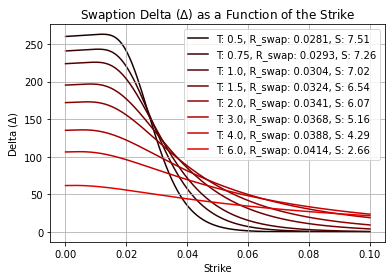

In [77]:
# Create a figure and primary y-axis
fig, ax = plt.subplots()

# Title
ax.set_title(f"Swaption Delta ($\Delta$) as a Function of the Strike")

# Primary y-axis
y1_lines = []
for i in range(0,N_maturity-1):
    y1_line, = ax.plot(strike,
                      delta_swaption[i,:],
                      color = ((i+1)/N_maturity,0,0),
                      linestyle='-',
                      label=f"T: {T[idx_maturity[i]]}, R_swap: {round(R_swap[idx_maturity[i]],4)}, S: {round(S_swap_new[idx_maturity[i]],2)}",
                      zorder = i)
    
    y1_lines.append(y1_line)

ax.set_ylabel("Delta ($\Delta$)")

# X-axis
ax.set_xlabel("Strike")

# Show legend
lines = y1_lines
labels = [item.get_label() for item in y1_lines]
ax.legend(lines, labels, loc="upper right")

# Add grid
ax.grid(True)

# Show the plot
plt.show()

### Gamma ($\Gamma$)

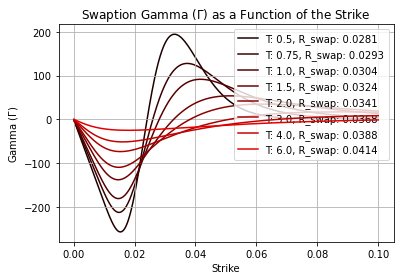

In [78]:
# Create a figure and primary y-axis
fig, ax = plt.subplots()

# Title
ax.set_title(f"Swaption Gamma ($\Gamma$) as a Function of the Strike")

# Primary y-axis
y1_lines = []
for i in range(0,N_maturity-1):
    y1_line, = ax.plot(strike,
                      gamma_swaption[i,:],
                      color = ((i+1)/N_maturity,0,0),
                      linestyle='-',
                      label=f"T: {T[idx_maturity[i]]}, R_swap: {round(R_swap[idx_maturity[i]],4)}",
                      zorder = i)
    
    y1_lines.append(y1_line)

    
ax.set_ylabel("Gamma ($\Gamma$)")

# X-axis
ax.set_xlabel("Strike")

# Show legend
lines = y1_lines
labels = [item.get_label() for item in y1_lines]
ax.legend(lines, labels, loc="upper right")

# Add grid
ax.grid(True)

# Show the plot
plt.show()

### Vega ($\nu$)

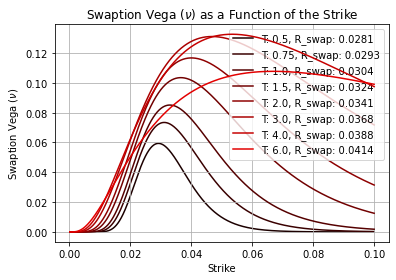

In [79]:
# Create a figure and primary y-axis
fig, ax = plt.subplots()

# Title
ax.set_title(f"Swaption Vega ($\\nu$) as a Function of the Strike")

# Primary y-axis
y1_lines = []
for i in range(0,N_maturity-1):
    y1_line, = ax.plot(strike,
                      vega_swaption[i,:],
                      color = ((i+1)/N_maturity,0,0),
                      linestyle='-',
                      label=f"T: {T[idx_maturity[i]]}, R_swap: {round(R_swap[idx_maturity[i]],4)}",
                      zorder = i)
    
    y1_lines.append(y1_line)

ax.set_ylabel("Swaption Vega ($\\nu$)")

# X-axis
ax.set_xlabel("Strike")

# Show legend
lines = y1_lines
labels = [item.get_label() for item in y1_lines]
ax.legend(lines, labels, loc="upper right")

# Add grid
ax.grid(True)

# Show the plot
plt.show()

### Theta ($\Theta$)

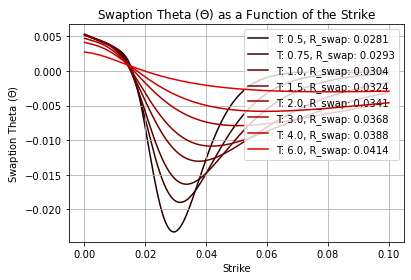

In [80]:
# Create a figure and primary y-axis
fig, ax = plt.subplots()

# Title
ax.set_title(f"Swaption Theta ($\Theta$) as a Function of the Strike")

# Primary y-axis
y1_lines = []
for i in range(0,N_maturity-1):
    y1_line, = ax.plot(strike,
                      theta_swaption[i,:],
                      color = ((i+1)/N_maturity,0,0),
                      linestyle='-',
                      label=f"T: {T[idx_maturity[i]]}, R_swap: {round(R_swap[idx_maturity[i]],4)}",
                      zorder = i)
    
    y1_lines.append(y1_line)

ax.set_ylabel("Swaption Theta ($\Theta$)")

# X-axis
ax.set_xlabel("Strike")

# Show legend
lines = y1_lines
labels = [item.get_label() for item in y1_lines]
ax.legend(lines, labels, loc="upper right")

# Add grid
ax.grid(True)

# Show the plot
plt.show()